In [ ]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
# from Funcs import *
from cpmFunctions import *

In [2]:
## FC files
path = '../data/fc_individual/'
file = glob.glob(os.path.join(path,'*.txt'))

# get subject id
subj_list = [ os.path.split(f)[1].replace('.fc.txt', '') for f in file ] # to get the subj id from file name
subj_list = np.array(subj_list, dtype=str) # data structure conversion, list to arrary
subj_list

array(['AP004', 'AP005', 'AP008', 'AP010', 'AP011', 'AP012', 'AP013',
       'AP017', 'AP020', 'AP021', 'AP022', 'AP031', 'AP032', 'AP035',
       'AP036', 'AP039', 'AP040', 'AP042', 'AP043', 'AP048', 'AP051',
       'AP052', 'AP053', 'AP054', 'AP055', 'AP056', 'AP057', 'AP058',
       'AP059', 'AP062', 'AP063', 'AP066', 'AP086', 'AP088', 'AP099',
       'AP100', 'AP103', 'AP104', 'AP106', 'AP107', 'AP108', 'AP113',
       'AP117', 'AP118', 'AP119', 'AP121', 'AP124', 'AP126', 'AP127',
       'AP128', 'AP130', 'AP132', 'AP134', 'BIPP002', 'BIPP003',
       'BIPP005', 'BIPP007', 'BIPP008', 'BIPP009', 'BIPP011', 'BIPP015',
       'BIPP016', 'BIPP017', 'BIPP020', 'BIPP021', 'BIPP022', 'BIPP023',
       'BIPP024', 'BIPP025', 'BIPP026', 'BIPP029', 'BIPP030', 'BIPP034',
       'BIPP035', 'BIPP036', 'BIPP038', 'BIPP039', 'BIPP042', 'BIPP044',
       'BIPP045', 'BIPP046', 'BIPP049'], dtype='<U7')

In [3]:
# read in FC matrices
path = '../data/fc_individual/'
all_fc_data = read_in_matrices(subj_list, file_suffix=None, data_dir=Path(path))

all_fc_data.shape
# 82 subj, 69751 edges
# edge number = n_nodes*(n_nodes-1)/2, 69751 in this case

(82, 69751)

In [4]:
all_fc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,69741,69742,69743,69744,69745,69746,69747,69748,69749,69750
AP004,0.589502,0.391531,0.744787,0.105008,-0.409532,-0.150604,0.580714,1.215954,0.350991,0.513298,...,0.283323,0.174020,0.015907,0.061645,-0.126262,0.078534,0.120290,0.059363,0.143467,0.681774
AP005,0.022247,0.602142,0.212879,0.021809,0.274204,-0.259140,0.288064,1.075386,0.049666,0.243955,...,0.096592,0.184416,0.040913,0.367595,-0.184455,0.212257,0.032364,0.059685,0.134932,0.393408
AP008,-0.230435,0.638050,0.691670,0.384615,0.799698,0.307928,0.750357,1.089931,-0.188571,0.839656,...,0.060743,0.156824,-0.153544,-0.270294,-0.606021,-0.641511,-0.096450,0.247250,-0.172145,1.009934
AP010,0.322194,0.189322,0.147343,0.375238,0.418908,-0.151681,0.657381,1.213646,0.125078,0.317274,...,0.319425,0.147441,-0.099329,-0.218560,0.132417,-0.214501,0.327319,0.129829,0.191228,0.522155
AP011,0.538108,0.615433,0.825074,0.337795,0.517183,0.149990,0.509944,0.644842,0.519686,0.400126,...,-0.073276,-0.096244,0.135203,0.127497,0.103744,0.009315,0.107196,0.189989,0.294300,0.472145


### Get binary matrix in CPM

In [5]:

## PCA data
all_pca_data = pd.read_csv('../data/var6_8yo_sbj82_imp_pca.csv', index_col=0)
all_pca_data.dtypes

# filter
pca_data = all_pca_data[all_pca_data.index.isin(subj_list)]
pca_data.shape

(82, 6)

In [6]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6
AP004,-0.267872,-0.569413,-0.191704,-0.246434,-0.831273,-0.314136
AP005,-1.636895,-0.345104,0.914331,-0.277202,1.256553,-1.081958
AP008,1.409288,-1.967726,1.506612,-0.382402,-1.897989,-1.363728
AP010,-1.538489,0.282625,1.242431,0.489090,-0.194798,0.272000
AP011,-0.322119,0.234508,-0.211833,0.213974,-0.245438,0.335576
...,...,...,...,...,...,...
BIPP042,0.892790,-1.325742,-0.740638,-0.790490,-0.527635,0.031469
BIPP044,1.635038,0.086737,-0.547961,2.062205,0.736897,-0.072438
BIPP045,1.856773,-1.039891,-0.217883,-1.783808,-0.201552,-0.192351
BIPP046,-0.633813,-0.751122,0.666631,0.183440,0.725284,0.425441


In [7]:
# run CPM
k = all_fc_data.shape[0]
cpm_kwargs = {'r_thresh': 0.3, 'corr_type': 'pearson', 'verbose': False}


behav_obs_pred, all_masks, corr = cpm_wrapper_seed(all_fc_data, pca_data, behav='PC1', k=k, seed=202209, **cpm_kwargs)

doing fold 0
doing fold 1
doing fold 2
doing fold 3
doing fold 4
doing fold 5
doing fold 6
doing fold 7
doing fold 8
doing fold 9
doing fold 10
doing fold 11
doing fold 12
doing fold 13
doing fold 14
doing fold 15
doing fold 16
doing fold 17
doing fold 18
doing fold 19
doing fold 20
doing fold 21
doing fold 22
doing fold 23
doing fold 24
doing fold 25
doing fold 26
doing fold 27
doing fold 28
doing fold 29
doing fold 30
doing fold 31
doing fold 32
doing fold 33
doing fold 34
doing fold 35
doing fold 36
doing fold 37
doing fold 38
doing fold 39
doing fold 40
doing fold 41
doing fold 42
doing fold 43
doing fold 44
doing fold 45
doing fold 46
doing fold 47
doing fold 48
doing fold 49
doing fold 50
doing fold 51
doing fold 52
doing fold 53
doing fold 54
doing fold 55
doing fold 56
doing fold 57
doing fold 58
doing fold 59
doing fold 60
doing fold 61
doing fold 62
doing fold 63
doing fold 64
doing fold 65
doing fold 66
doing fold 67
doing fold 68
doing fold 69
doing fold 70
doing fold 71
do

In [8]:
# convert `all masks` to 374*374 matrix
# `all masks` is a dictionary that has 2 keys and 2 items
# will use one of them as an example

all_masks # have a look, it's not binary yet

{'pos': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'neg': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

In [9]:
all_masks['pos']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
print(all_masks['pos'].shape)

(82, 69751)


In [72]:
edge_frac = (all_masks['pos'].sum(axis=0))/(all_masks['pos'].shape[0])
# all_masks['pos'].sum(axis=0), column sum
# all_masks['pos'].shape[0], row number

edge_frac_square = sp.spatial.distance.squareform(edge_frac) # Convert a vector-form distance vector to a square-form distance matrix

In [73]:
edge_frac_square

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
edge_frac_square.shape

(374, 374)

In [58]:
# ditstribution
np.histogram(edge_frac_square)
## now it's not binary, need a threshold to mask the matrix

(array([139106,    104,     54,     44,     16,     18,     24,     40,
            80,    390]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

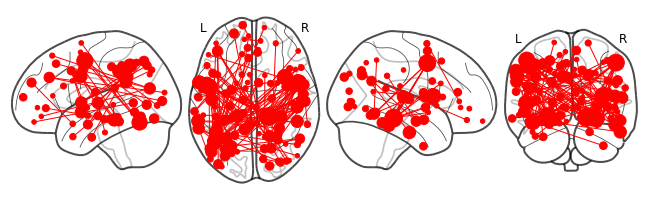

In [17]:
## plot glasser
node_coords = pd.read_csv("../data/coords/MMP_MNI_374_UCCHILD_coords.txt", index_col=None, header=None, sep=" ")

thresh = 1

node_mask = np.amax(edge_frac_square, axis=0) >= thresh # find nodes that have at least one edge that passes the threshold
node_size = edge_frac_square.sum(axis=0)*node_mask*20 # size nodes based on how many suprathreshold edges they have
## above two lines are from cpm author


plot_connectome(adjacency_matrix=edge_frac_square, edge_threshold=thresh,
                    node_color = 'red',
                    node_coords=node_coords, node_size=node_size,
                    display_mode= 'lzry',
                    edge_kwargs={"linewidth": 1, 'color': 'red'})

In [77]:
mat_mask = edge_frac_square >= thresh

In [83]:
## to export the matrix
# mask
edge_frac_square[mat_mask] = 1
edge_frac_square[~mat_mask] = 0

edge_frac_square.shape

(374, 374)

In [87]:
np.histogram(edge_frac_square)

(array([139666,      0,      0,      0,      0,      0,      0,      0,
             0,    210]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [90]:
## save it
np.savetxt('pos_test_fmt.csv', edge_frac_square, delimiter=',', fmt='%d') 

### Get binary matrix without cpm

We only need `all_masks` to get the binary matrices. So how CPM works doesn't matter, we just need to create a object has similar data structure with `all masks`.

- load FC matrices with `read_in_matrices`, get `fc_df`
    - dataframe with n rows and m columns (n=subj, m=edges)
- whatever transformation
- **KEY STEP**: get symmetric matrix
    ```python
        edge_frac = (fc_df.sum(axis=0))/(fc_df.shape[0]) # maybe need to convert to array
        edge_frac_square = sp.spatial.distance.squareform(edge_frac) # Convert a vector-form distance vector to a square-form distance matrix
    ```
- mask: make it binary
    - some as 0, some as 1